Import data wrangling and preprocessing modules

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import warnings

Load your data

In [54]:
data=pd.read_csv(r'd:\Data\Kaggle\train-metadata.csv')

C:\Users\TONNY\AppData\Local\Temp\ipykernel_2484\1948464799.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'd:\Data\Kaggle\train-metadata.csv')


In [21]:
data.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [22]:
data

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [55]:
data.isna().sum()

isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

Check the duplicates

In [24]:
data.duplicated().sum()

0

Drop unecessary columns

In [56]:
data.drop(columns=['copyright_license', 'patient_id', 'tbp_tile_type', 'image_type', 'attribution'], inplace=True)

Visualize your data and check outliers

C:\Users\TONNY\AppData\Local\Temp\ipykernel_8812\737365511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data.sex, palette='mako')


<Axes: xlabel='sex', ylabel='count'>

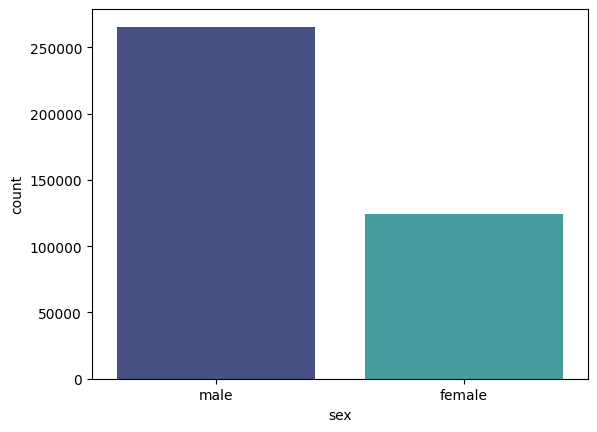

In [42]:
sns.countplot(x=data.sex, palette='mako')

<Axes: ylabel='age_approx'>

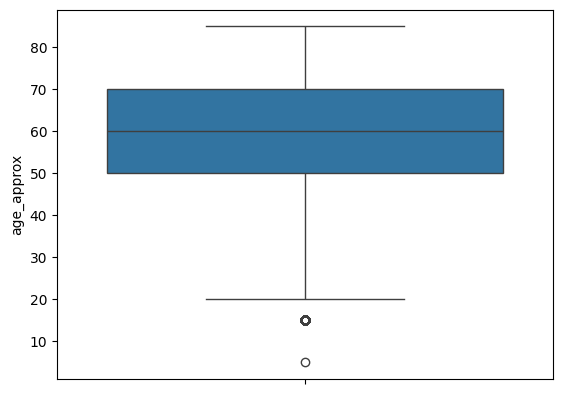

In [43]:
sns.boxplot(data.age_approx)

Fill the null values with mode value

In [57]:
for i in data.columns:
    data[i].fillna(data[i].mode()[0], inplace=True)

C:\Users\TONNY\AppData\Local\Temp\ipykernel_2484\2781008145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)
C:\Users\TONNY\AppData\Local\Temp\ipykernel_2484\2781008145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [27]:
data.isna().sum()

isic_id                         0
target                          0
age_approx                      0
sex                             0
anatom_site_general             0
clin_size_long_diam_mm          0
tbp_lv_A                        0
tbp_lv_Aext                     0
tbp_lv_B                        0
tbp_lv_Bext                     0
tbp_lv_C                        0
tbp_lv_Cext                     0
tbp_lv_H                        0
tbp_lv_Hext                     0
tbp_lv_L                        0
tbp_lv_Lext                     0
tbp_lv_areaMM2                  0
tbp_lv_area_perim_ratio         0
tbp_lv_color_std_mean           0
tbp_lv_deltaA                   0
tbp_lv_deltaB                   0
tbp_lv_deltaL                   0
tbp_lv_deltaLB                  0
tbp_lv_deltaLBnorm              0
tbp_lv_eccentricity             0
tbp_lv_location                 0
tbp_lv_location_simple          0
tbp_lv_minorAxisMM              0
tbp_lv_nevi_confidence          0
tbp_lv_norm_bo

Lets Encode and normalize our data

In [58]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

C:\Users\TONNY\AppData\Local\Temp\ipykernel_8812\2207218274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.anatom_site_general, palette='mako')


<Axes: xlabel='count', ylabel='anatom_site_general'>

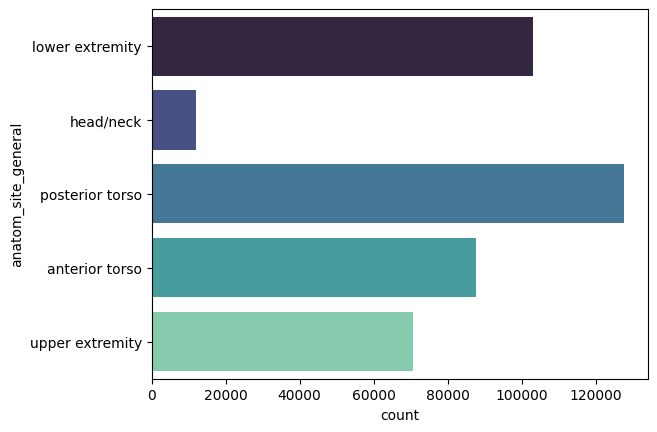

In [79]:
sns.countplot(data.anatom_site_general, palette='mako')

C:\Users\TONNY\AppData\Local\Temp\ipykernel_8812\1258436979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.tbp_lv_location, palette='magma')


<Axes: xlabel='count', ylabel='tbp_lv_location'>

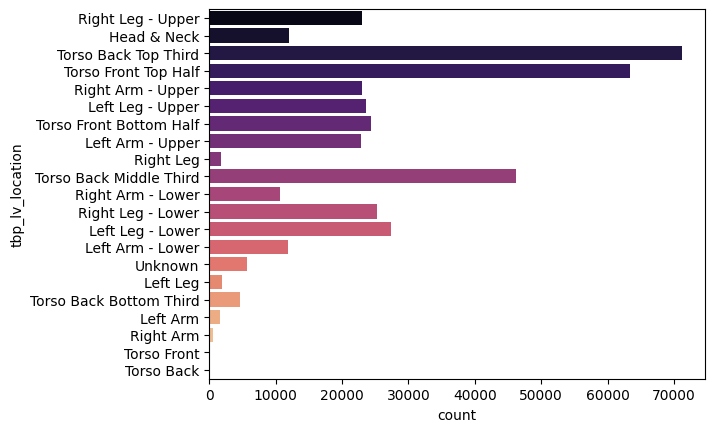

In [74]:
#data=pd.get_dummies(data, columns=['anatom_site_general'])
sns.countplot(data.tbp_lv_location, palette='magma')

checck y_values

In [29]:
data.target.value_counts()

target
0    400666
1       393
Name: count, dtype: int64

In [30]:
data.target.shape

(401059,)

<Axes: xlabel='target', ylabel='count'>

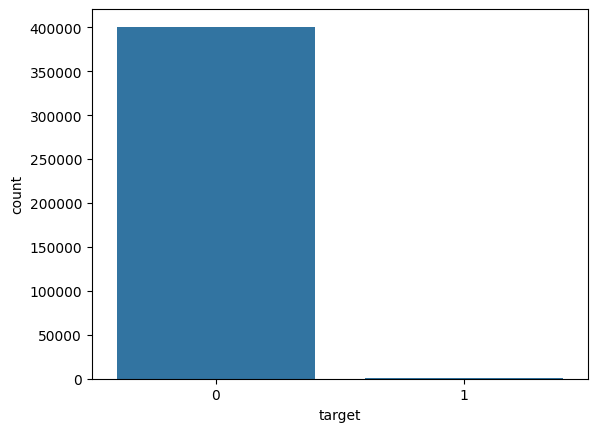

In [15]:
sns.countplot(data=data, x='target')

([<matplotlib.patches.Wedge at 0x1c2f885dc50>,
 [Text(-1.0999947877417378, 0.0033862872012632244, 'No Cancer'),
  Text(1.2999938401257447, -0.004001953912789918, 'Cancer Present')],
 [Text(-0.5999971569500387, 0.0018470657461435768, '99.90%'),
  Text(0.7999962093081505, -0.0024627408694091807, '0.10%')])

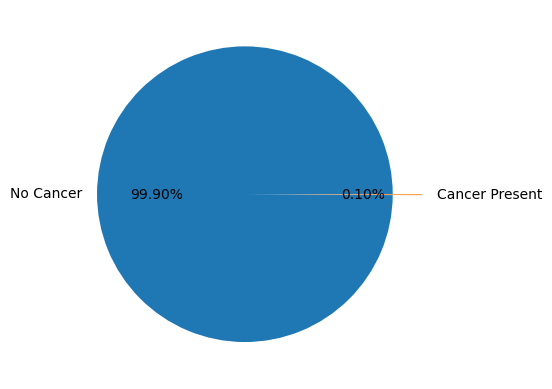

In [35]:
plt.pie(data.target.value_counts(), explode=[0, 0.2], autopct='%.2f%%', labels=['No Cancer', 'Cancer Present'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Right Leg - Upper'),
  Text(1, 0, 'Head & Neck'),
  Text(2, 0, 'Torso Back Top Third'),
  Text(3, 0, 'Torso Front Top Half'),
  Text(4, 0, 'Right Arm - Upper'),
  Text(5, 0, 'Left Leg - Upper'),
  Text(6, 0, 'Torso Front Bottom Half'),
  Text(7, 0, 'Left Arm - Upper'),
  Text(8, 0, 'Right Leg'),
  Text(9, 0, 'Torso Back Middle Third'),
  Text(10, 0, 'Right Arm - Lower'),
  Text(11, 0, 'Right Leg - Lower'),
  Text(12, 0, 'Left Leg - Lower'),
  Text(13, 0, 'Left Arm - Lower'),
  Text(14, 0, 'Unknown'),
  Text(15, 0, 'Left Leg'),
  Text(16, 0, 'Torso Back Bottom Third'),
  Text(17, 0, 'Left Arm'),
  Text(18, 0, 'Right Arm'),
  Text(19, 0, 'Torso Front'),
  Text(20, 0, 'Torso Back')])

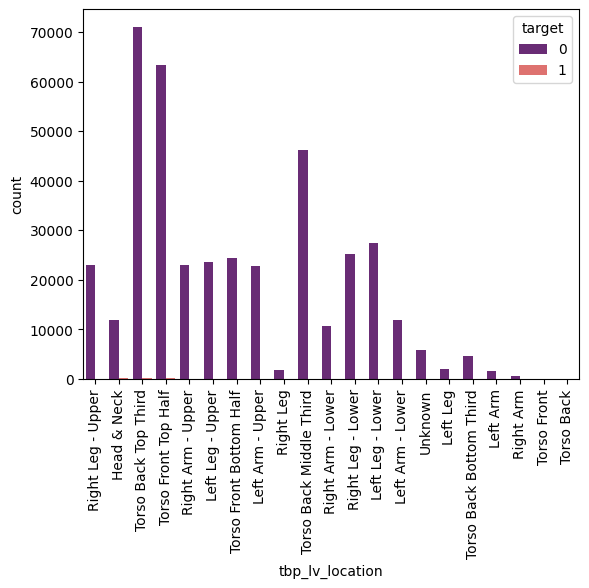

In [18]:
sns.countplot(data=data, x='tbp_lv_location', palette='magma', hue='target')
plt.xticks(rotation=90)

In [93]:
data.dtypes

isic_id                           int32
target                          float64
age_approx                      float64
sex                               int32
anatom_site_general               int32
clin_size_long_diam_mm          float64
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64
tbp_lv_deltaLB                  float64
tbp_lv_deltaLBnorm              float64
tbp_lv_eccentricity             float64


Encode data

In [59]:
le=LabelEncoder()
#var=['sex', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple']
for i in data.columns:
        if data[i].dtypes==object:
                if i=='isic_id' or i=='target':
                        continue
                data[i]=le.fit_transform(data[i])

Normalize the values

In [60]:
scaler=MinMaxScaler()
for col in data.columns:
    if data[col].dtypes==float or data[col].dtypes=='int64' or data[col].dtypes=='int32':
        if i=='isic_id' or i=='target':
            continue
        data[[col]]=scaler.fit_transform(data[[col]])

Our target and sex values are integer

In [61]:
data.target=data.target.astype(int)
data.sex=data.sex.astype(int)

In [10]:
data

,isic_id,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,0.6875,1,0.50,0.074453,0.448560,0.549700,0.502444,0.376069,...,0.000000,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,0.975173
1,ISIC_0015845,0,0.6875,1,0.25,0.003650,0.674860,0.747149,0.491697,0.391260,...,0.670989,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,0.031415
2,ISIC_0015864,0,0.6875,1,0.75,0.087591,0.494565,0.568489,0.703178,0.619598,...,0.000000,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,0.998040
3,ISIC_0015902,0,0.7500,1,0.00,0.081022,0.330121,0.460827,0.402979,0.303669,...,0.000000,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,0.999900
4,ISIC_0024200,0,0.6250,1,0.00,0.063139,0.536985,0.632028,0.494130,0.420931,...,0.000000,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,0.704425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,0.8125,1,0.00,0.211679,0.494536,0.521126,0.515904,0.447931,...,0.953575,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,1.000000
401055,ISIC_9999951,0,0.6875,1,0.75,0.077007,0.443295,0.544600,0.633924,0.556393,...,0.000000,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,0.999998
401056,ISIC_9999960,0,0.7500,0,0.00,0.038321,0.391100,0.465157,0.555550,0.441107,...,0.986127,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,0.999994
401057,ISIC_9999964,0,0.3125,0,0.00,0.065693,0.488897,0.404430,0.529857,0.454194,...,0.000000,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,1.000000


Working with sklean

In [62]:
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
#from tensorflow.keras.utils import to_categorical

# Assuming your CSV has columns including 'id', 'filename' for image file names, 'label' for class labels (0 to 9), and 100 other features
csv_path = data
image_dir = 'D:/Data/Kaggle/train-image/image'

Images with cancer are less, lets start with them

In [63]:
data=data.sort_values(by='target', ascending=False)

In [13]:
data

,isic_id,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
80682,ISIC_2068746,1,0.8125,1,1.0,0.156934,0.489600,0.514804,0.556625,0.575042,...,0.970848,1.000000,1.0,1.000000,0.541667,0.56,0.0,0.000000,0.020833,1.000000
128872,ISIC_3266736,1,0.6875,1,1.0,0.073358,0.389344,0.415479,0.518543,0.471429,...,0.209321,0.882353,1.0,1.000000,0.416667,0.40,0.0,0.000000,0.020833,1.000000
118241,ISIC_3005303,1,0.9375,1,0.0,0.152555,0.329956,0.487742,0.273282,0.266223,...,0.822868,0.745098,1.0,0.923077,0.875000,0.56,0.0,0.000000,0.020833,0.448230
172939,ISIC_4363101,1,0.4375,0,0.5,0.239416,0.565392,0.499050,0.372094,0.330137,...,0.387360,0.686275,1.0,0.846154,0.125000,0.16,0.0,0.000000,0.020833,0.999929
97208,ISIC_2480600,1,0.5000,1,0.0,0.563869,0.247201,0.496397,0.234831,0.391921,...,0.482432,0.882353,1.0,1.000000,0.416667,0.40,0.0,0.166667,0.479167,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,ISIC_0315124,0,0.4375,0,1.0,0.062044,0.545063,0.609282,0.609105,0.503655,...,0.000000,0.000000,0.0,0.230769,0.583333,0.56,0.0,0.000000,0.020833,1.000000
9754,ISIC_0315138,0,0.5625,1,0.5,0.098905,0.432830,0.550273,0.436125,0.298854,...,0.000000,0.000000,0.0,0.230769,0.583333,0.56,0.0,0.000000,0.020833,0.997098
9755,ISIC_0315146,0,0.7500,1,0.0,0.153650,0.397269,0.439354,0.582167,0.463937,...,0.000000,0.000000,0.0,0.230769,0.583333,0.56,0.0,0.000000,0.020833,1.000000
9756,ISIC_0315166,0,0.6250,0,1.0,0.161314,0.261731,0.385639,0.297635,0.193091,...,0.000000,0.000000,0.0,0.230769,0.583333,0.56,0.0,0.000000,0.020833,0.961533


Preprocess your data, respective image to its row in a df, converting the respective img to array

Delete image, label and feature from cache since much memory may be consumed

In [ ]:
import gc
filenames=[]
labels=[]
images=[]
#import torch
for index, row in data.iterrows():
    try:
        filename = row['isic_id'] + '.jpg'
        label = row['target']
        img_path = os.path.join(image_dir, filename)

         # Read and preprocess image (resize, normalize.)
        img = imread(img_path, as_gray=True)
        img = resize(img, (128, 128))
        img=img.flatten()
        # Resize to desired size
        #img = img.astype('float32') / 255.0  # Normalize pixel values

        images.append(img)
        del img

        labels.append(label)
        del label

        # Extract additional features (assuming they are numeric)
        #image_features = row.drop([ 'target'])
        filenames.append(image_features)
        del filename

        gc.collect()
        #torch.cuda.empty_cache()

    except FileNotFoundError:
        # if filename not in img_path:
        #     del filename
        filename=[]
        label=[]
        features=[]
        #data.drop(data[data.isic_id=filename], inplace=True)
        #del filename
        #del row
        #data.drop(row, inplace=True, axis=1)
        continue

In [65]:
labels=np.array(labels)
filenames=np.array(filenames)
images=np.array(images)

In [66]:
images=images.reshape(-1,128*128)

In [67]:
'filenames:', filenames.shape, 'labels:', labels.shape, 'images:', images.shape

('filenames:', (14374, 49), 'labels:', (14374,), 'images:', (14374, 16384))

In [68]:
data[data['isic_id']==filenames[220:331][0][0]]

,isic_id,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
63669,ISIC_1645097,1,0.5,1,1.0,0.123358,0.654484,0.655181,0.457986,0.392198,...,0.868386,0.686275,1.0,0.846154,0.125,0.16,0.0,0.0,0.020833,0.99946


Text(0.5, 1.0, 'img id: ISIC_5463326,  Cancer :[0]')

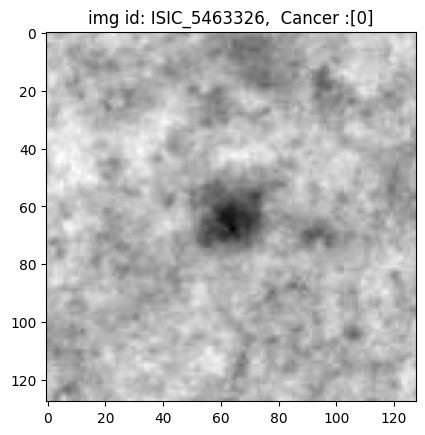

In [70]:
plt.imshow(images[321:322].reshape(128, 128), cmap='gray')
plt.title('img id: '+filenames[321:322][0][0] + ',  Cancer :' +str(labels[321:322]))

In [71]:
labels.shape

(14374,)

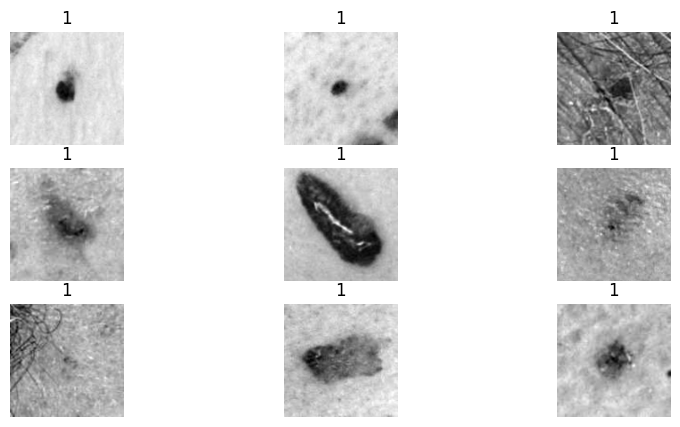

In [69]:

plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].reshape(128, 128), cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

In [65]:
#np.savez('D:/Data/Kaggle/CancerDf.npz', images=images, labels=labels, filenames=filenames)

In [9]:
#data=np.load('D:/Data/Kaggle/CancerData.npz', allow_pickle=True)

Split your dataset

In [74]:
# Split data into training and validation sets
X_img_train, X_img_val, X_feat_train, X_feat_val, y_train, y_val = train_test_split(images, filenames, labels, test_size=0.2, random_state=42)

In [15]:
#np.savez('D:/Data/Kaggle/datasetCancer.npz', X_img_train=X_img_train, X_img_val=X_img_val, X_feat_train=X_feat_train, X_feat_val=X_feat_val, y_train=y_train, y_val=y_val)

In [11]:
#data=np.load('D:/Data/Kaggle/datasetCancer.npz', allow_pickle=True)

In [75]:
images.shape

(14374, 16384)

Import your classifier

In [271]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=11, random_state=15)

Lets check the train and test data

In [222]:
X_img_val.shape, labels.shape

((2875, 16384), (14374,))

Fit the data and Classify the images

In [272]:
Kmeans.fit(X_img_train)

KMeans(n_clusters=11, random_state=15)

In [78]:
Kmeans.cluster_centers_.shape

(11, 16384)

In [234]:
np.unique(Kmeans.labels_/10)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Lets Predict the class

In [ ]:
a='ISIC_2581432'
for i in filenames[:1]:
    if a in filenames:
        print(filenames)

In [295]:
def search_img_loc(a):
    if data.query("'isic_id'== 'a'"):
        return X_feat_train[a]

In [ ]:
search_img_loc('isic_id')

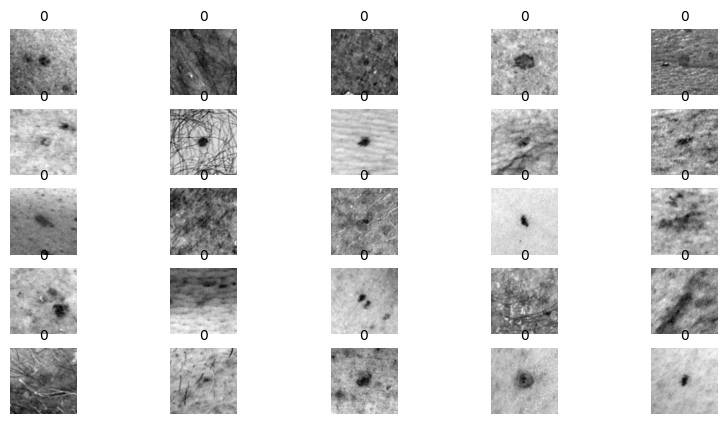

In [86]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_img_train[i].reshape(128,128), cmap='gray')
    plt.title(y_train[i],fontdict={'fontsize':10})
    plt.axis('off')

In [522]:
n=220

Lets write a program that will help us search/load img using id or index

In [531]:
if a !='int':
    pass

a='ISIC_1645097'

for i in range(len(X_img_train)):
    # if filenames[i][0]==a:
    #     print('filenames index',i, ': Filename ',filenames[i][0])
    #     print('data_df :', str(data[data['isic_id']==a].index))
    if X_feat_train[i][0]==a:
        #print('filenames index',i, ': Filename ',X_feat_val[i][0])
        print('data_df :', str(data[data['isic_id']==a].index))
        print(X_feat_train[i][0])

data_df : Index([63669], dtype='int64')
ISIC_1645097


In [524]:
X_feat_train[0][0]

'ISIC_5632610'

In [513]:
data[data['isic_id']==X_feat_train[n][0]]

,isic_id,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
213726,ISIC_5374185,0,0.5625,1,0.0,0.064599,0.452114,0.474395,0.586199,0.450515,...,0.0,0.0,0.0,0.230769,0.583333,0.56,0.0,0.0,0.020833,0.999997


In [452]:
X_img_train[n]

array([0.60165017, 0.61729426, 0.62741317, ..., 0.72375558, 0.71575501,
       0.71154831])

Text(0.5, 1.0, 'ISIC_5426968:0')

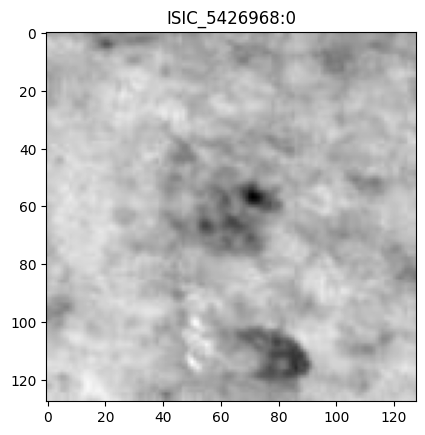

In [453]:
plt.imshow(X_img_train[n].reshape(128, 128), cmap='gray')
plt.title(X_feat_train[n][0] + ':' + str(y_train[n]))

In [454]:
pred=Kmeans.predict(X_img_train[n-1:n])

In [455]:
X_feat_train[n][0], float(pred/10)

C:\Users\TONNY\AppData\Local\Temp\ipykernel_2484\2186696801.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_feat_train[n][0], float(pred/10)


('ISIC_5426968', 0.4)

End
---------------------------------------------------------------------------------------

Lets try CNN/ Tensorflow

In [2]:
import numpy as np
data=np.load('D:\Data\Kaggle\CancerData.npz')

In [ ]:
# Define image input shape
img_input = Input(shape=(128, 128, 3))
# CNN model for image processing
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 units for 10 classes, softmax activation
])

In [ ]:
# Define MLP model for features
mlp_input = Input(shape=(100,))
mlp_model = Dense(64, activation='relu')(mlp_input)
mlp_model = Dropout(0.5)(mlp_model)
mlp_model = Dense(64, activation='relu')(mlp_model)

In [ ]:
# Concatenate CNN and MLP outputs
combined_model = concatenate([cnn_model(img_input), mlp_model])

# Final output layer
output = Dense(10, activation='softmax')(combined_model)  # Softmax activation for multi-class classification

In [ ]:

# Create the combined model
model = Model(inputs=[img_input, mlp_input], outputs=output)

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])# Use sparse_categorical_crossentropy for integer labels

In [ ]:

# Print model summary
model.summary()

# Train the model
history = model.fit([X_img_train, X_feat_train], y_train, epochs=20, batch_size=32, validation_data=([X_img_val, X_feat_val], y_val))

# Evaluate the model
loss, accuracy = model.evaluate([X_img_val, X_feat_val], y_val)
print(f'Validation accuracy: {accuracy}')

# Save the model
model.save('cancer_classification_model_10_classes.h5')

Try prediction

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.cluster import KMeans
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

# Function to extract features using a pretrained CNN (VGG16 in this case)
def extract_features(img_path, model):
    img = imread(img_path)
    img = resize(img, (224, 224))  # Resize image to VGG16 input size
    img = preprocess_input(img)  # Preprocess image for VGG16
    features = model.predict(np.expand_dims(img, axis=0))
    return features.flatten()

# Directory containing your cancer images
image_dir = 'path_to_your_images_directory'

# Load pre-trained VGG16 model (without the top dense layers)
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv2').output)  # Use deeper layers for features

# Extract features for all images in the directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
features_list = [extract_features(img_path, model) for img_path in image_files]

# Convert features_list to numpy array
features_array = np.array(features_list)

# Perform K-means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_array)

# Visualize some example images from each cluster (optional)
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    sample_images = np.random.choice(cluster_indices, 3, replace=False)
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(sample_images):
        plt.subplot(1, 3, i + 1)
        img = imread(image_files[idx])
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f'Cluster {cluster}')
    plt.show()
